In [72]:
import warnings 
warnings.filterwarnings('ignore')


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv(r'C:\Users\hp\Desktop\CS_Assignments/SMSSpamCollection',sep="\t",names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
df.columns

Index(['target', 'message'], dtype='object')

In [76]:
df.shape

(5572, 2)

In [77]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [78]:
df['message'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Ok.                                                                                                                                                                     4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

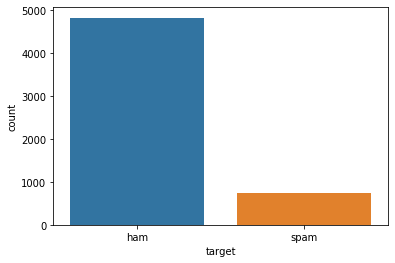

In [79]:
sns.countplot(x='target',data=df)

In [80]:
from wordcloud import WordCloud, STOPWORDS

In [81]:
df=df.loc[df['target']=='ham',:]
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [82]:
words=' '.join(df['message'])
print(words)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [83]:
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black',width=1600,height=800).generate(words)

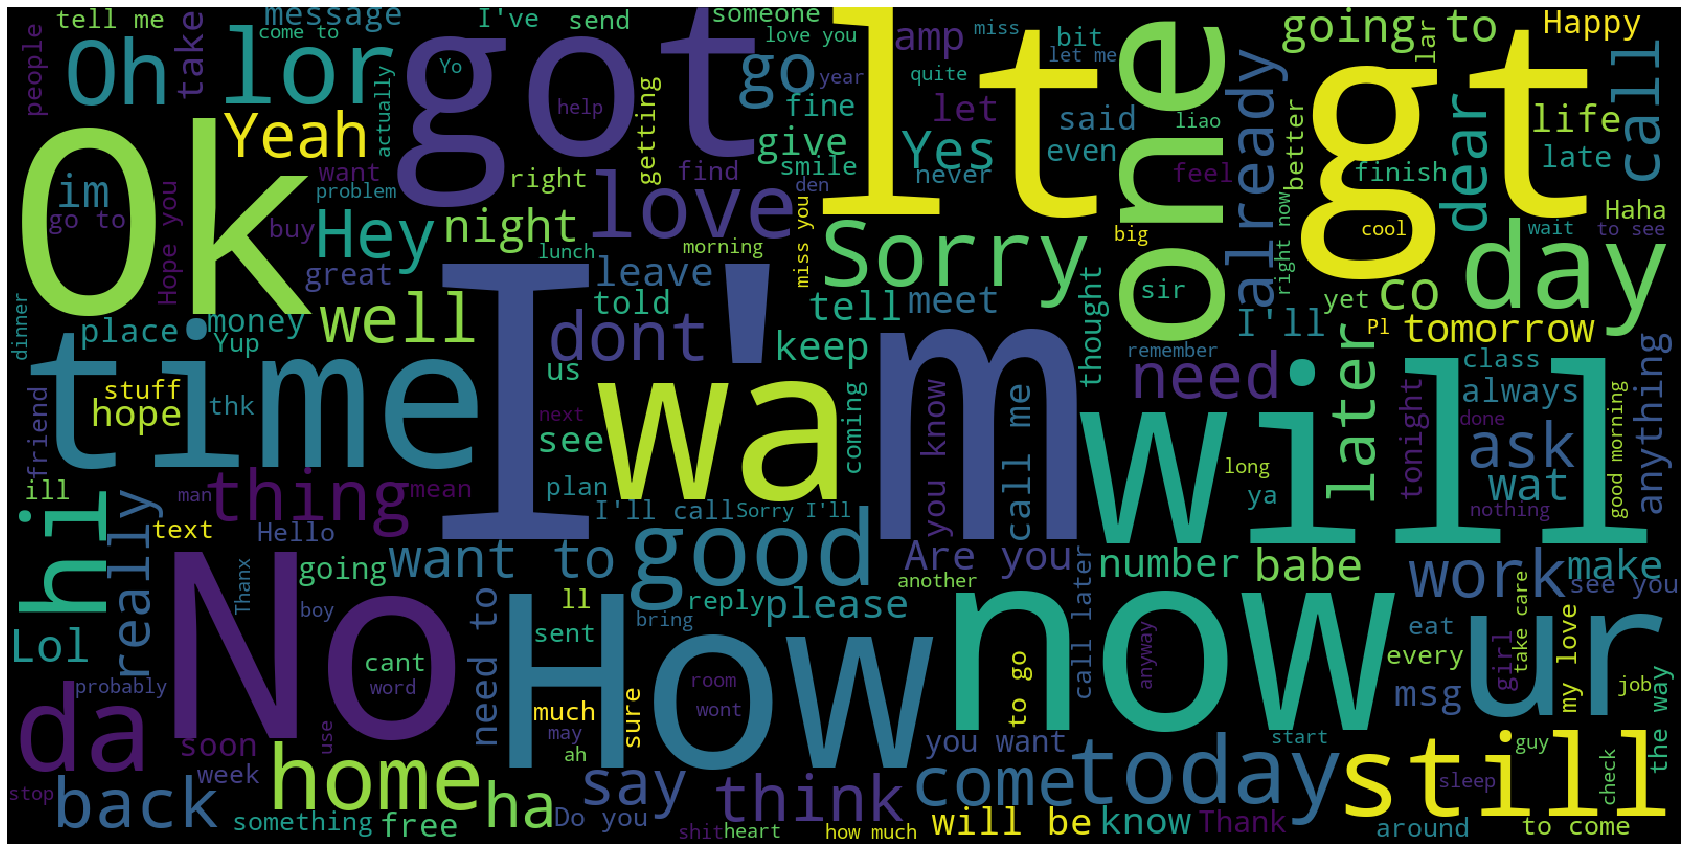

In [84]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [85]:
#df2=df.loc[df['target']=='spam',:]
#word2=' '.join(df2['message'])
#print(df2)

Empty DataFrame
Columns: [target, message]
Index: []


In [87]:
#print(word2)

In [39]:
#wordclouds=WordCloud(stopwords=STOPWORDS,background_color='black',width=1600,height=800).generate(word2)

ValueError: We need at least 1 word to plot a word cloud, got 0.

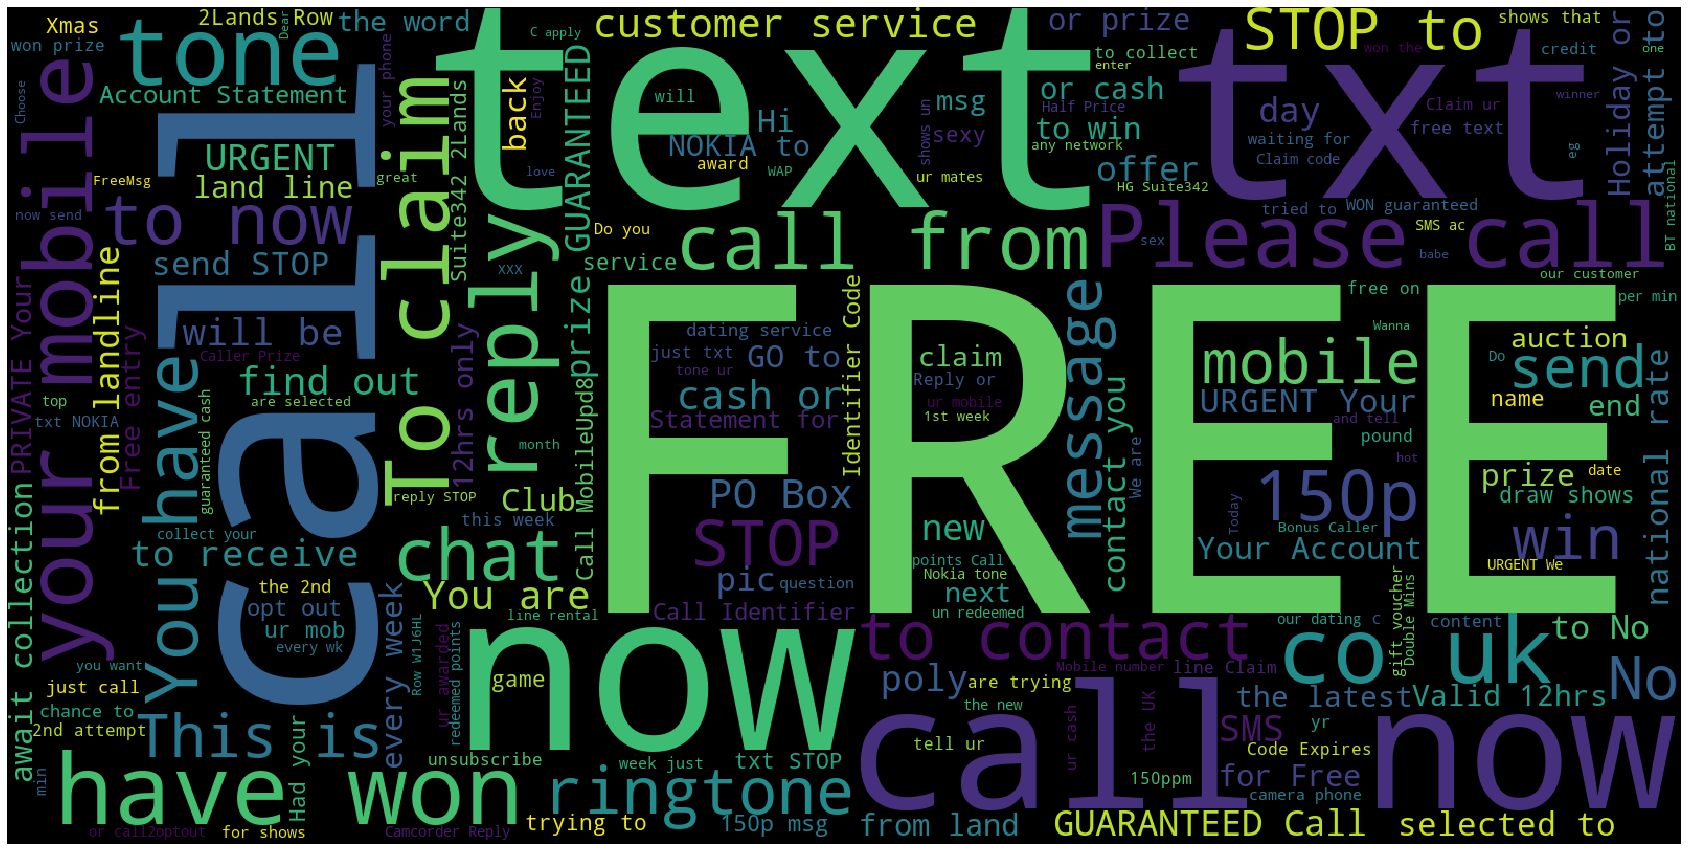

In [88]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordclouds)
plt.axis('off')
plt.show()

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [118]:
 import nltk
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [93]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [94]:
stemmer=PorterStemmer()

In [95]:
lemmatizer=WordNetLemmatizer()

In [99]:
clean=[]
lst=[]

In [119]:
def preprocess(raw,flag):
    letters_only=re.sub("[^a-zA-Z]"," ",raw)
    
    letters_only=letters_only.lower()
    
    words=letters_only.split()
    
    words=[w for w in words if not w in stopwords.words("english")]
    
    if(flag=='stem'):
        words=[stemmer.stem(word) for word in words]
    else:
        words=[lemmatizer.lemmatize(word) for word in words]
        
    clean.append(" ".join(words))
    lst.append(len(words))

In [120]:
df['tar']=df['message'].apply(lambda x:0 if x=='spam' else 1)

In [132]:
%%time

clean=[]
lst=[]
df['message'].apply(lambda x: preprocess(x,'stem'))

df['stem']=clean
df['length_stem']=lst

Wall time: 49.9 s


In [140]:
%%time
clean=[]
lst=[]

df['message'].apply(lambda x:preprocess(x,'lemma'))
df['lem']=clean
df['length_lem']=lst

Wall time: 50 s


In [141]:
df.head()

,target,message,tar,clean_lemma,length_lema,stem,length_stem,lem,length_lem
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazy available bugis n great ...,16,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,1,ok lar joking wif u oni,6,ok lar joke wif u oni,6,ok lar joking wif u oni,6
3,ham,U dun say so early hor... U c already then say...,1,u dun say early hor u c already say,9,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah think go usf life around though,7,nah think goe usf live around though,7,nah think go usf life around though,7
6,ham,Even my brother is not like to speak with me. ...,1,even brother like speak treat like aid patent,8,even brother like speak treat like aid patent,8,even brother like speak treat like aid patent,8


<b>DataPreparation</b>

In [142]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)


In [143]:

train_clean=[]
for i in train['stem']:
    train_clean.append(i)

test_clean=[]
for i in test['stem']:
    test_clean.append(i)

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(analyzer="word")

train_features=vectorizer.fit_transform(train_clean)

test_features=vectorizer.transform(test_clean)

In [145]:
vectorizer.vocabulary_

{'cool': 894,
 'like': 2415,
 'swim': 4157,
 'pool': 3244,
 'jacuzzi': 2161,
 'hous': 1974,
 'parent': 3094,
 'kidz': 2288,
 'friend': 1607,
 'colleagu': 822,
 'scream': 3674,
 'surpris': 4137,
 'wait': 4622,
 'sofa': 3904,
 'nake': 2797,
 'hi': 1912,
 'yiju': 4873,
 'meet': 2612,
 'tmr': 4340,
 'said': 3615,
 'anyth': 189,
 'wrong': 4816,
 'sorri': 3939,
 'de': 1019,
 'give': 1704,
 'treat': 4418,
 'first': 1510,
 'answer': 178,
 'question': 3392,
 'oki': 2976,
 'home': 1946,
 'watch': 4648,
 'tv': 4453,
 'lor': 2467,
 'askd': 261,
 'hour': 1972,
 'good': 1732,
 'sleep': 3853,
 'rhythm': 3545,
 'person': 3154,
 'establish': 1355,
 'bodi': 501,
 'learn': 2376,
 'use': 4536,
 'want': 4637,
 'know': 2305,
 'lover': 2488,
 'need': 2833,
 'desir': 1070,
 'go': 1717,
 'doctor': 1156,
 'liver': 2437,
 'get': 1685,
 'bit': 468,
 'stylish': 4090,
 'ur': 4521,
 'hair': 1828,
 'manag': 2559,
 'that': 4258,
 'haha': 1824,
 'hope': 1959,
 'hear': 1884,
 'receipt': 3455,
 'sound': 3945,
 'gd': 1670

In [146]:
print("Total unique words:",len(vectorizer.vocabulary_))
print("Type of train_features:",type(train_features))
print("Shape of input data",train_features.shape)

Total unique words: 4909
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (3860, 4909)


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [149]:
Classifiers=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200)]


In [153]:
%%time

dense_features=train_features.toarray()
dense_test=test_features.toarray()

for classifier in Classifiers:
    fit=classifier.fit(dense_features,train['message'])
    pred=fit.predict(dense_test)
    accuracy=accuracy_score(pred,test['message'])
 
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.09015544041450778
Accuracy of DecisionTreeClassifier is 0.09430051813471503


MemoryError: could not allocate 239468544 bytes